In [3]:

import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [58]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [59]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_16584\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [60]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [61]:

X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

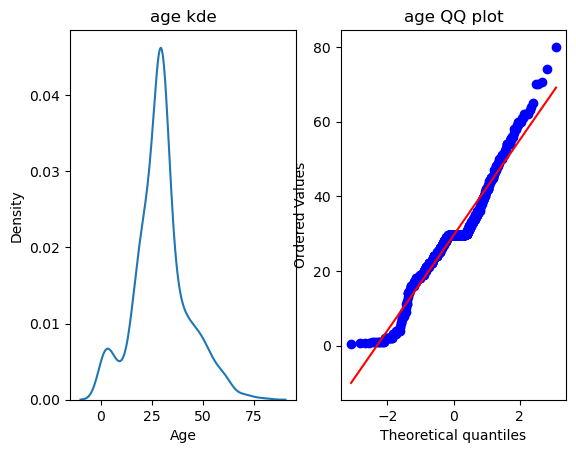

In [63]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain['Age'])
plt.title("age kde")

plt.subplot(1,2,2)
stats.probplot(xtrain['Age'],dist="norm",plot=plt)
plt.title("age QQ plot")

plt.show()


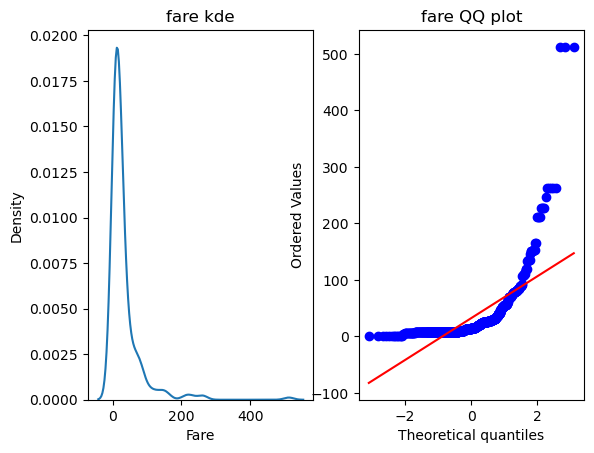

In [64]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain['Fare'])
plt.title("fare kde")

plt.subplot(1,2,2)
stats.probplot(xtrain['Fare'],dist="norm",plot=plt)
plt.title("fare QQ plot")

plt.show()


In [65]:

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [66]:
clf.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)
    
y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)
    
print("Accuracy LR",accuracy_score(ytest,y_pred))
print("Accuracy DT",accuracy_score(ytest,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


## Using Function Tranformer ##

In [67]:
t1=FunctionTransformer(func=np.log1p)

In [68]:
xtrain_log=t1.fit_transform(xtrain)
xtest_log=t1.transform(xtest)

In [69]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(xtrain_log,ytrain)
clf2.fit(xtrain_log,ytrain)
    
y_pred = clf.predict(xtest_log)
y_pred1 = clf2.predict(xtest_log)
    
print("Accuracy LR",accuracy_score(ytest,y_pred))
print("Accuracy DT",accuracy_score(ytest,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


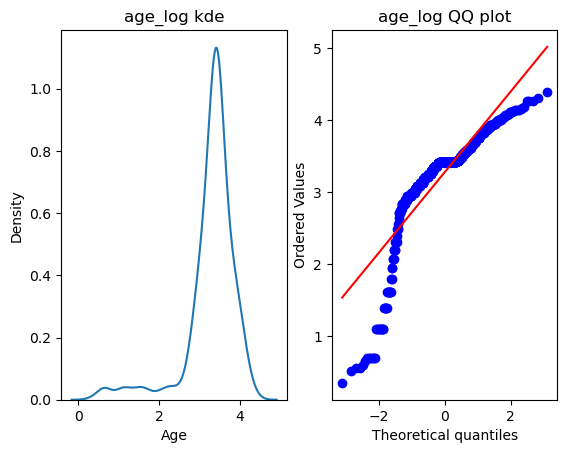

In [70]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain_log['Age'])
plt.title("age_log kde")

plt.subplot(1,2,2)
stats.probplot(xtrain_log['Age'],dist="norm",plot=plt)
plt.title("age_log QQ plot")

plt.show()

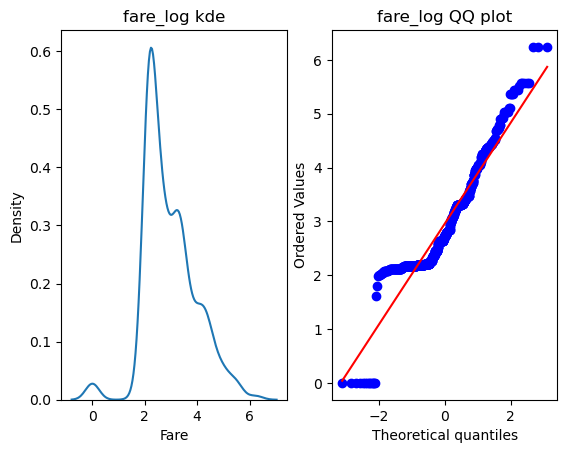

In [71]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain_log['Fare'])
plt.title("fare_log kde")

plt.subplot(1,2,2)
stats.probplot(xtrain_log['Fare'],dist="norm",plot=plt)
plt.title("fare_log QQ plot")

plt.show()

**we can see that the log tranfomration made more skewed to age data but made less skew to fare data(as fare data is right skwed)**

## Other Transformer ##

In [72]:

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([(f'{transform}',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


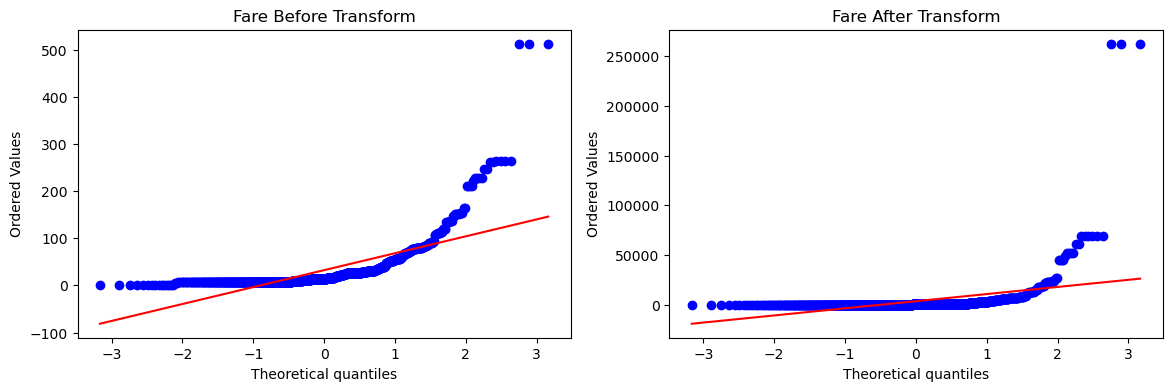

In [73]:
apply_transform(lambda x:x**2)

Accuracy 0.6712609238451936


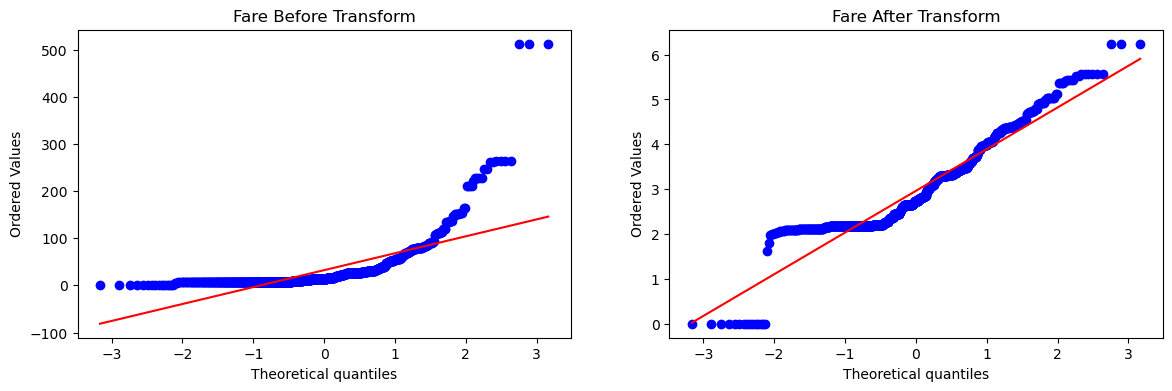

In [74]:
apply_transform(np.log1p)

Accuracy 0.6589013732833957


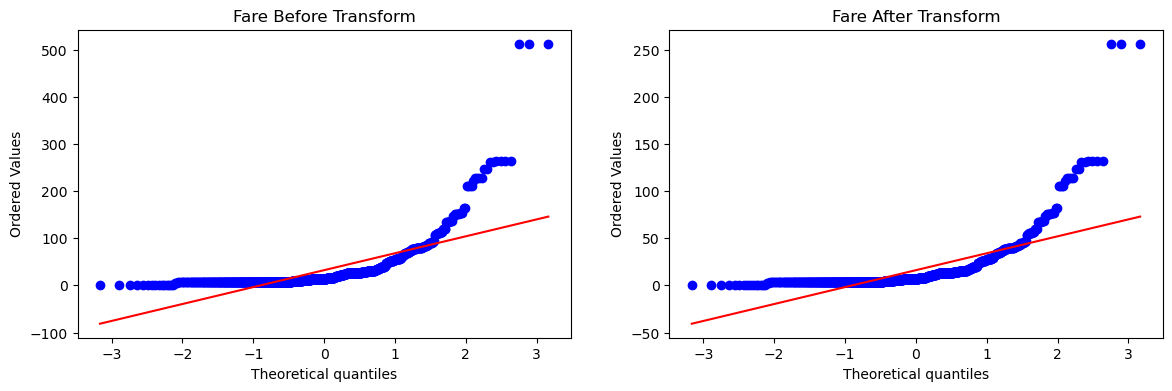

In [77]:
apply_transform(lambda x:x**1/2)

Accuracy 0.61729088639201


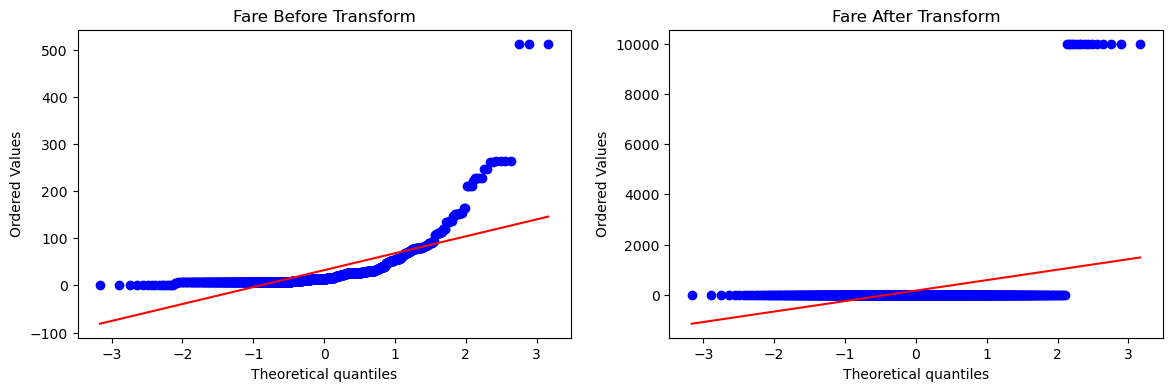

In [80]:
apply_transform(lambda x:1/(x+0.0001))